# Data Loading and Initial Exploration

## Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-dark') 

In [2]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


## Number of Speeches per President

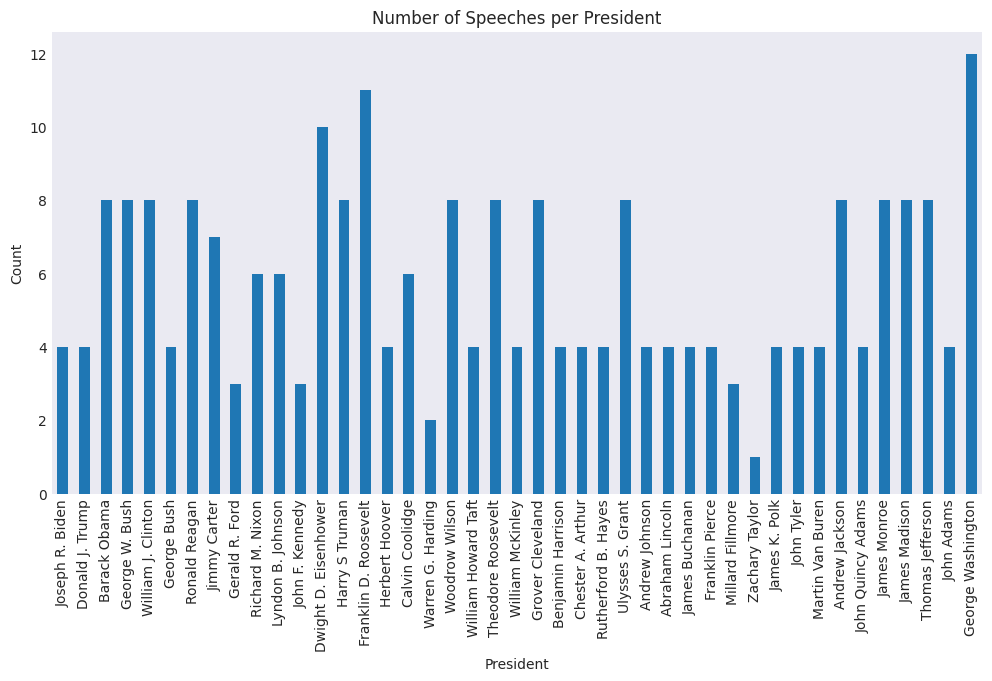

In [3]:
speech_counts = sou['President'].value_counts()
president_order = sou['President'].unique()
speech_counts = speech_counts.reindex(president_order)

speech_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.savefig("outputs/p1_speeches_per_president.png")
plt.show()

This plot shows the number of speeches each president of the United States delivered during their time in office. There's a clear pattern: presidents who served two full terms, such as Obama and Clinton, typically gave between 7-8 speeches, which match the expected annual schedule, while those presidents with shorter time in office have noticeably fewer addresses. One outlier is Roosevelt, having a high count since he served four terms. George Washington with the maximum count given the early practice of personally deliverying multiple speeches during his presidency. Overall, the distribution closely aligns with presidential term length and historical context, with long-serving presidents naturally giving more speeches and short-term or transitional presidents giving fewer.

## Number of Speeches per Year

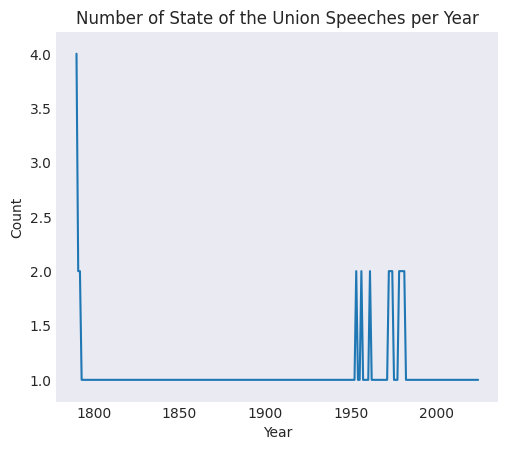

In [4]:
counts = sou['Year'].value_counts().sort_index()

counts.plot(
    kind='line',
    figsize=(5.7, 4.8)
)

plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.ylim(0.8, 4.2)
plt.savefig("outputs/p1_speeches_per_year.png")
plt.show()

This plot shows how the number of speeches in a given year has changed across U.S. history. The most notable feature is the long, stable period where exactly one speech is delivered each year. In earlier years and a small cluster of years in the mid-20th century there are more variability. After the mid-1900s, the pattern becomes standardized, with nearly every year containing exactly one speech.

## Word Count Distribution 

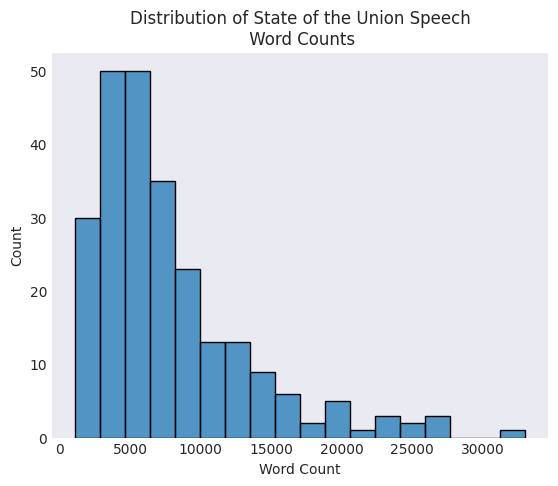

In [5]:
plt.figure(figsize=(6.4, 5))

sns.histplot(
    data=sou,
    x="Word Count",
    bins=18,
    edgecolor="black"
)

plt.title("Distribution of State of the Union Speech\n Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.savefig("outputs/p1_wordcount_distribution.png")
plt.show()

This histogram shows that the word count of the Union Speeches vary widely in length buth follow a right-skewed distribution. Most speeches cluster between 3,000 and 8,000 words, which is the range where the majority of presidents deliver message within. At the same time, there is a noticable tail of much longer speeches, with several exceeding 15,000 and a few surpassing 25,000. These most likely are during the earlier years as the modern ones are generally kept shorter and more standardized.

## Word Count Distribution over Year

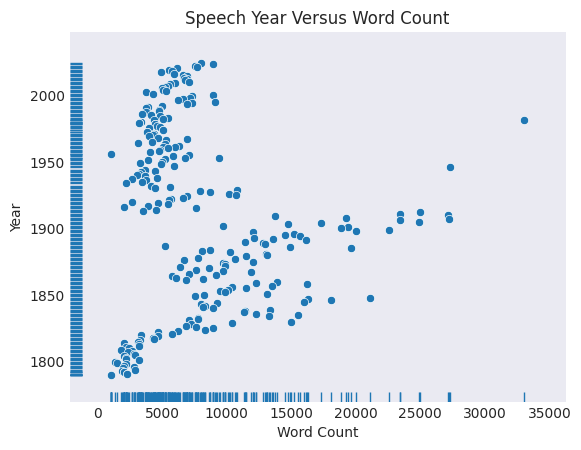

In [6]:
sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year"
)

sns.rugplot(
    data=sou,
    x="Word Count",
    y="Year",
    height=0.025
)

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")
plt.ylim(1770, None)
plt.savefig("outputs/p1_year_vs_wordcount.png")
plt.show()

This scatter plot shows how the length of speeches has changed over time. From the plot, it is clear that speeches delivered in the late 19th and early 20th centuries tend to be significantly longer, which reflect the era when presidents submitted written reports rather than giving oral speeches. By contrast, modern speeches starting from the mid 20th century is in a much narrower band betweent around 3,000 words to 8,000 words. This indicates a shift toward a more standardized, concise format once the speech became primarily in-person. The rug plots reinforce this pattern, showing heavy concentration of modern speeches at lower word counts.

## Word Count Distribution per President

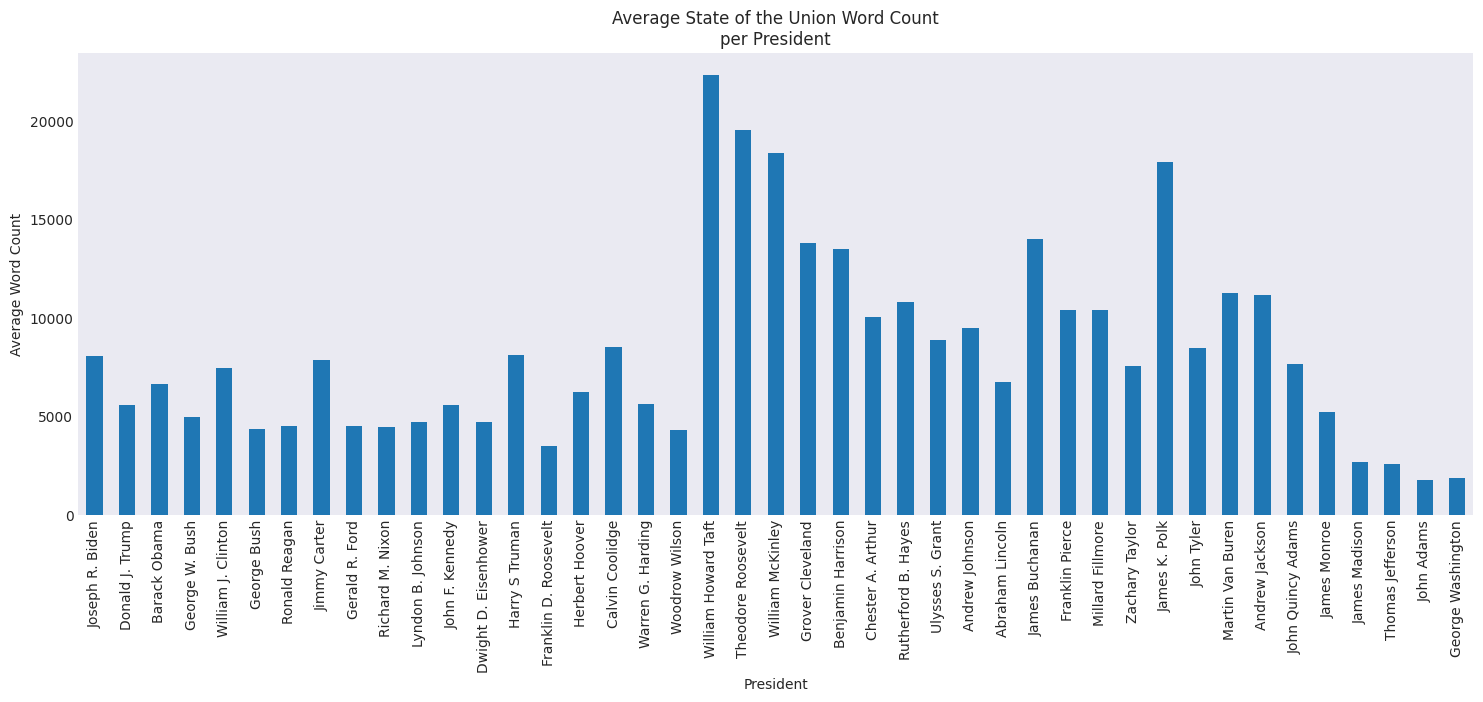

In [7]:
avg_wc = (
    sou.groupby("President")["Word Count"]
       .mean()
       .reindex(president_order)
)

plt.figure(figsize=(18, 6))

avg_wc.plot(kind="bar")

plt.title("Average State of the Union Word Count\nper President")
plt.xlabel("President")
plt.ylabel("Average Word Count")
plt.xticks(rotation=90)
plt.savefig("outputs/p1_mean_wordcount_per_president.png")
plt.show()

This plot compares the average length of State of the Union speeches across presidents, revealing substantial variation tied to both historical context and changes in how the address was delivered. Early presidents such as George Washington and John Adams have relatively short averages, reflecting the shorter oral addresses typical of the 18th century. In contrast, several presidents from the late 19th and early 20th centuries, such as William Howard Taft and Theodore Roosevelt, show extremely high average word counts. These spikes correspond to the era of long written reports, which were significantly longer than modern spoken speeches. A notable shift occurs after the mid-20th century, when averages drop and converge into a more consistent range. This reflects the transition to televised, in-person addresses, which tend to be shorter and more structured.